In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

## Data cleaning

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.size

168765

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
#drop unrelated/ blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [12]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
df.shape

(11251, 13)

In [15]:
#drop nullvalues
df.dropna(inplace=True)

In [16]:
df.shape

(11239, 13)

In [17]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
df["Amount"]=df["Amount"].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [23]:
df["Amount"].dtypes

dtype('int32')

In [24]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [25]:
#describe() return matematical description of numerical value
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [28]:
#use describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### findout maximum count of the buyers and maximum purchasing power of buyers

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

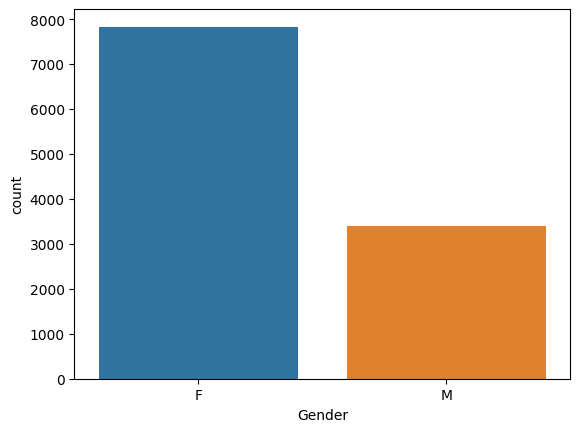

In [30]:
sns.countplot(x="Gender",data=df)

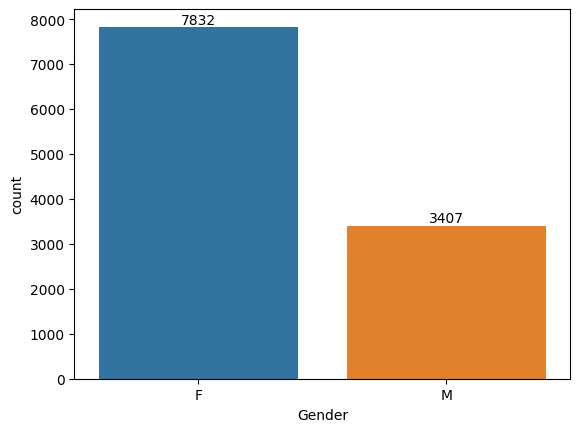

In [33]:
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
     ax.bar_label(bars)

In [41]:
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)


,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

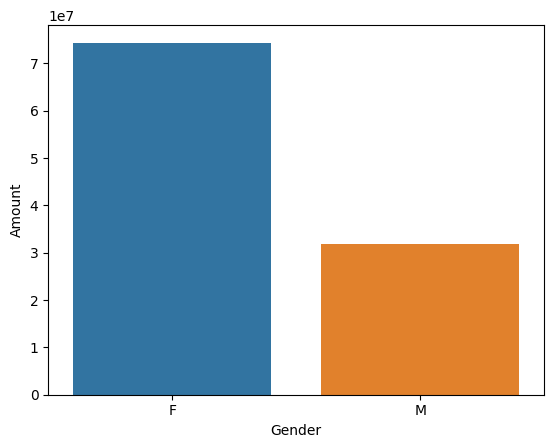

In [40]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender", y="Amount", data=sales_gen)

## Age

## find out the maximum age group and maximum purchasing power of buyers 

In [42]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

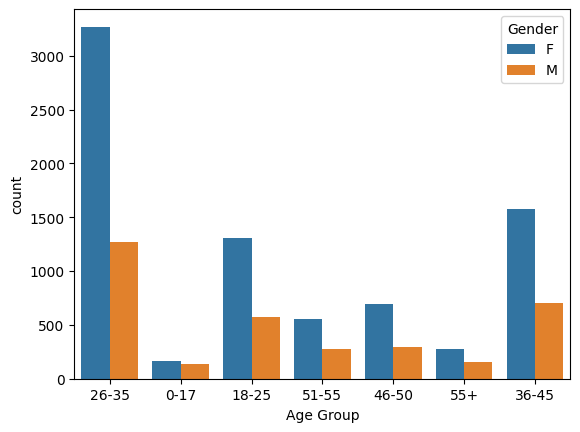

In [44]:
sns.countplot(data=df, x="Age Group", hue="Gender")

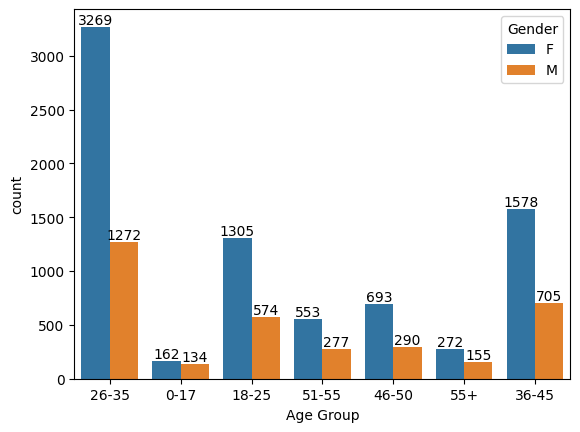

In [47]:
ax=sns.countplot(data=df, x="Age Group", hue="Gender")
for bars in ax.containers:
     ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

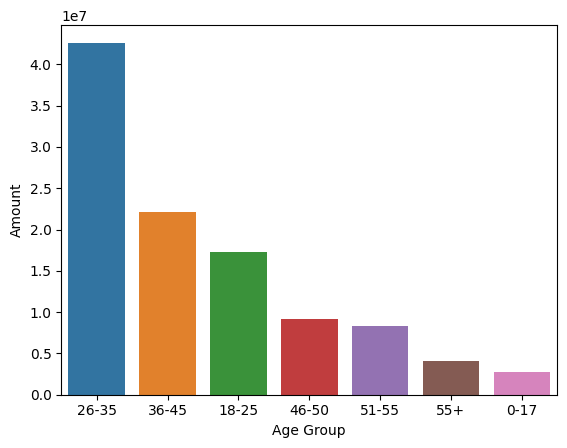

In [50]:
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group", y="Amount", data=sales_age)

## From above graph we can see most of the buyers are of age group between 26-35 yrs of female 

## State

In [53]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

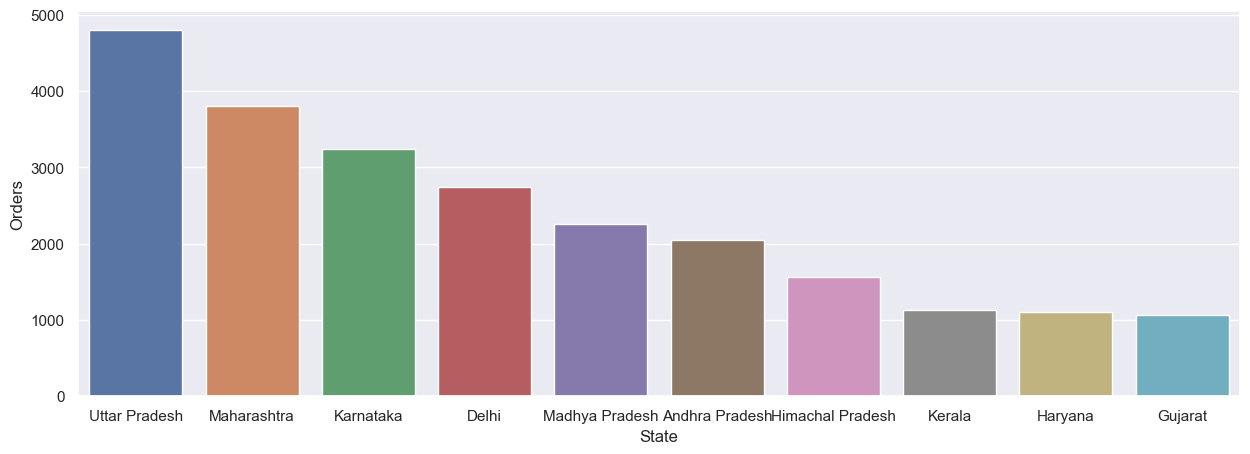

In [59]:
# total number of order from top 10 states
sales_state=df.groupby(['State'],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x="State", y="Orders", data=sales_state)


## Total amount sale from top 10 states

<Axes: xlabel='State', ylabel='Amount'>

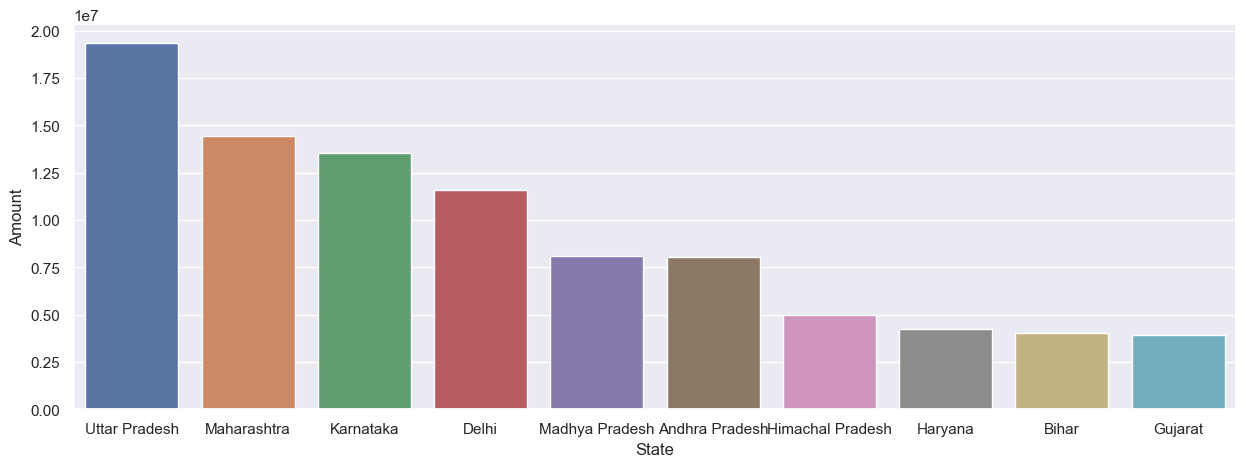

In [60]:
sales_state=df.groupby(['State'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x="State", y="Amount", data=sales_state)

### From above graph we can see most of the orders are from UP,Maharashtra,Karnataka respectively but total sales/amount is from UP,Karnataka,Maharshtra

## Mariatal_Status

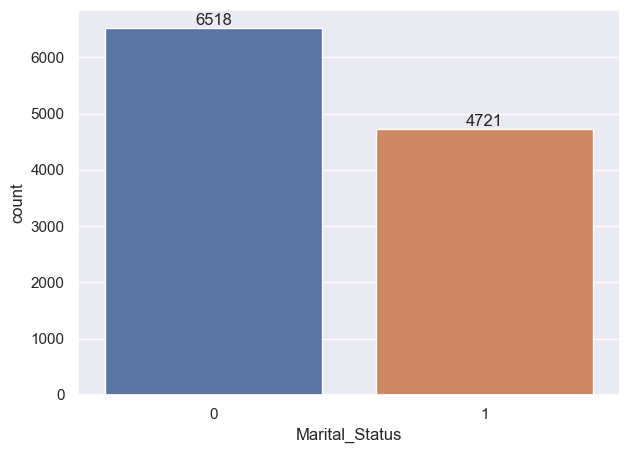

In [64]:
ax=sns.countplot(x="Marital_Status",data=df)
sns.set(rc={'figure.figsize': (7,5)})
for bars in ax.containers:
     ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

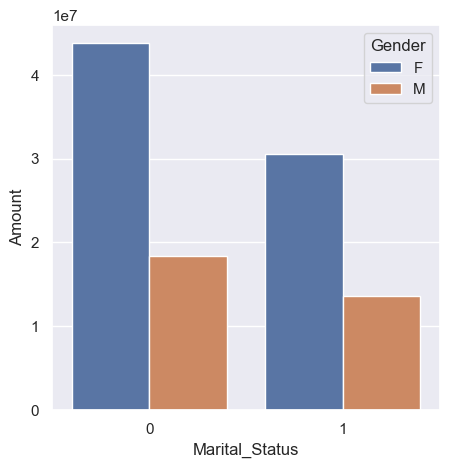

In [66]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={'figure.figsize': (5,5)})
sns.barplot(x="Marital_Status", y="Amount", data=sales_state,hue="Gender")

## From the above graph we can see that most of the buyers are married woman and they have high purchesing power

# Occupation

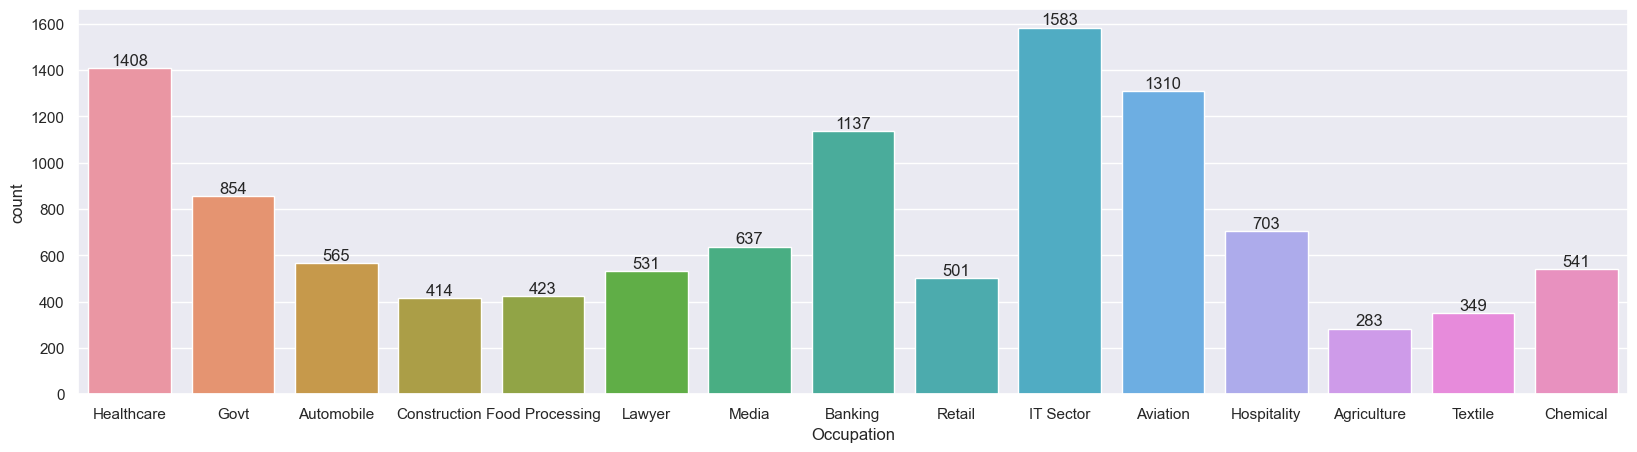

In [70]:
ax=sns.countplot(x="Occupation",data=df)
sns.set(rc={'figure.figsize': (22,5)})
for bars in ax.containers:
     ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

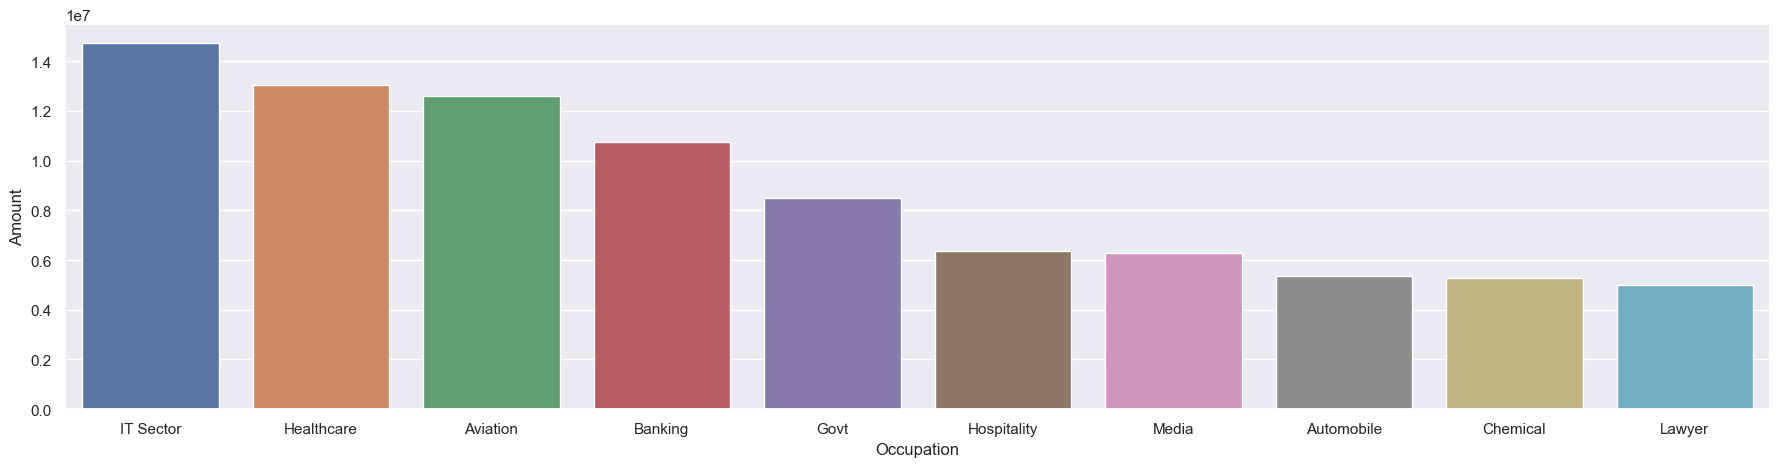

In [77]:
sales_state=df.groupby(['Occupation'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={'figure.figsize': (22,5)})
sns.barplot(x="Occupation", y="Amount", data=sales_state)

## From the above graph we can see most of the buyers are working in  IT sector,Healthcare and Aviation

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Product_Category

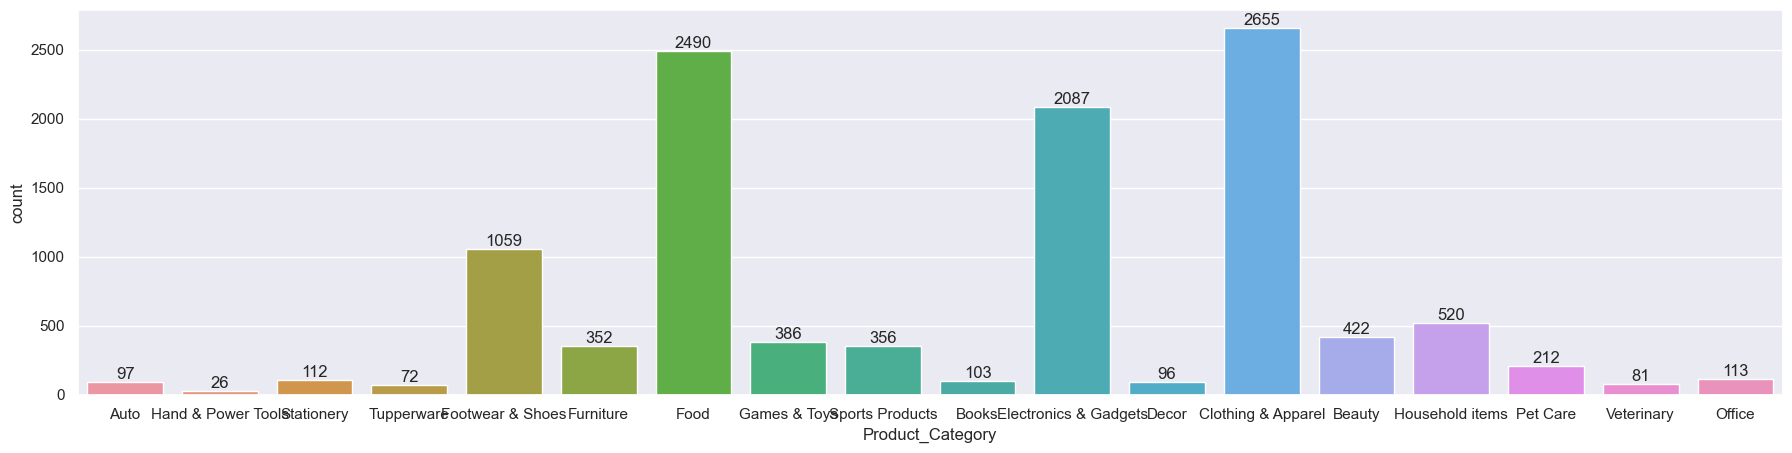

In [80]:
ax=sns.countplot(x="Product_Category",data=df)
sns.set(rc={'figure.figsize': (25,5)})
for bars in ax.containers:
     ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

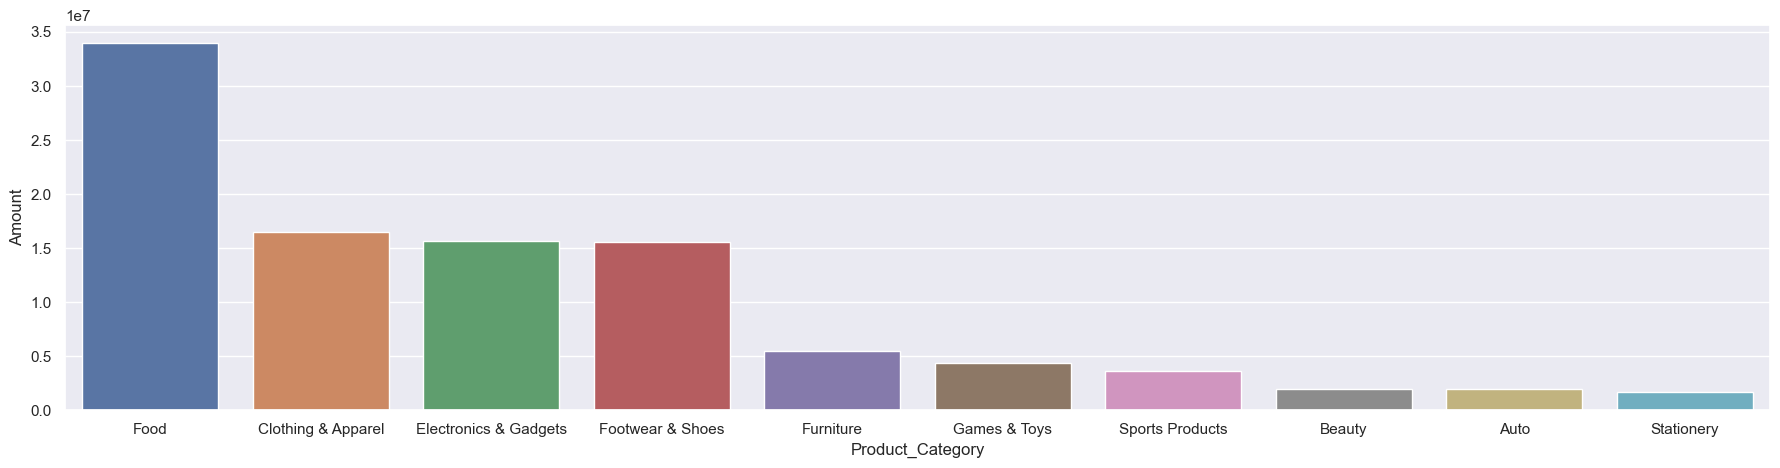

In [79]:
sales_state=df.groupby(['Product_Category'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={'figure.figsize': (22,5)})
sns.barplot(x="Product_Category", y="Amount", data=sales_state)

## From the above graph we can see most of the sold product are from Food,Clothing and Apparel,Electronics and Gadgets,Footware

<Axes: xlabel='Product_ID', ylabel='Orders'>

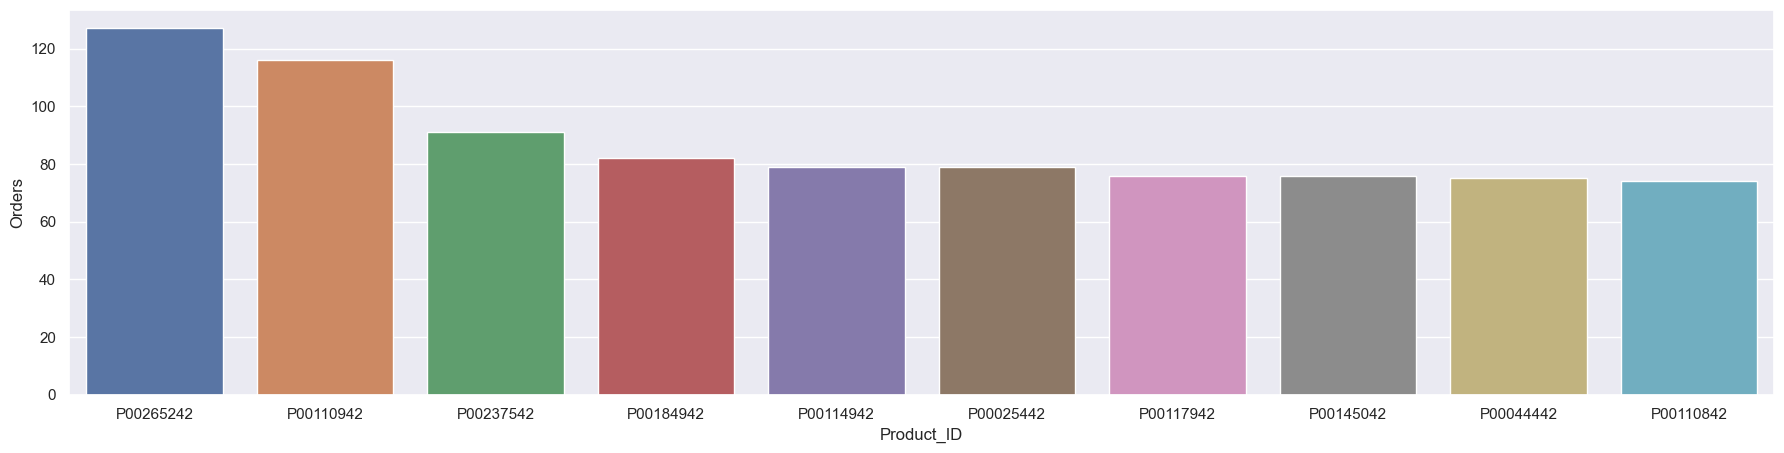

In [84]:
sales_state=df.groupby(['Product_ID'],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={'figure.figsize': (22,5)})
sns.barplot(x="Product_ID", y="Orders", data=sales_state)

# Conclusion

## Married women age group 26-35 yrs from UP,Maharashtra and Karnataka  working in IT , Healthcare and Aviation are more likely to buy product from food ,Clothing and Electronics Categogy